In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
gun_violence_df = pd.read_csv('gun-violence-data.csv')

In [12]:
gun_violence_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
gun_violence_df.drop([1], axis = 0, inplace = True)

In [14]:
def remove_prefix(x):
    li = []
    for i in x:
        li.append(i[3:])
    return li

In [6]:
gun_violence_df.drop(['incident_id', 'incident_url', 'source_url',
                      'incident_url_fields_missing','sources', 'address',
                      'congressional_district', 'state_house_district',
                      'state_senate_district', 'incident_characteristics'], axis = 1, inplace = True)

In [7]:
gun_violence_df.shape

(239676, 19)

In [8]:
gun_violence_df['date'].unique()

array(['2013-01-01', '2013-01-05', '2013-01-07', ..., '2018-03-29',
       '2018-03-30', '2018-03-31'], dtype=object)

In [9]:
gun_violence_df['year'] = gun_violence_df['date'].apply(lambda x: int(x[0: 4]))

In [10]:
gun_violence_df['month'] = gun_violence_df['date'].apply(lambda x: int(x[5: 7]))

In [11]:
gun_violence_df.drop('date', axis = 1, inplace = True)

In [12]:
gun_violence_df_2013 = gun_violence_df[gun_violence_df['year'] == 2013]
gun_violence_df_2014 = gun_violence_df[gun_violence_df['year'] == 2014]
gun_violence_df_2015 = gun_violence_df[gun_violence_df['year'] == 2015]
gun_violence_df_2016 = gun_violence_df[gun_violence_df['year'] == 2016]
gun_violence_df_2017 = gun_violence_df[gun_violence_df['year'] == 2017]
gun_violence_df_2018 = gun_violence_df[gun_violence_df['year'] == 2018]

In [13]:
gun_violence_df['state'].value_counts() * 100/239677

Illinois                7.324858
California              6.802906
Florida                 6.270522
Texas                   5.664707
Ohio                    4.274086
New York                4.052120
Pennsylvania            3.725430
Georgia                 3.723762
North Carolina          3.646157
Louisiana               3.380800
Tennessee               3.181782
South Carolina          2.895146
Missouri                2.766640
Michigan                2.560112
Massachusetts           2.495442
Virginia                2.482090
Indiana                 2.441619
Maryland                2.419089
Alabama                 2.282655
New Jersey              2.247608
Wisconsin               1.997271
Kentucky                1.734418
Mississippi             1.501604
Oklahoma                1.441523
Washington              1.432762
Colorado                1.335547
District of Columbia    1.333044
Connecticut             1.279639
Arkansas                1.185763
Iowa                    1.050163
Minnesota 

<BarContainer object of 6 artists>

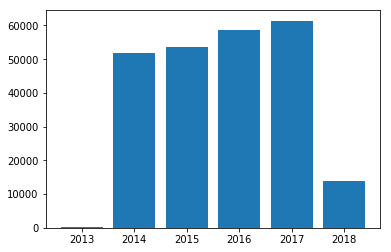

In [14]:
plt.bar(gun_violence_df['year'].value_counts().index, gun_violence_df['year'].value_counts())

In [15]:
gun_violence_df[gun_violence_df['year'] == 2018]['month'].unique()

array([1, 2, 3], dtype=int64)

In [16]:
def victim(x):
    count = 0
    for i in x:
        if i[3:] == 'Subject-Suspect':
            count += 1
    return count

In [17]:
gun_violence_df['location_description'].value_counts()[:5]

Austin        240
Walmart       232
7-Eleven      166
Motel 6       152
McDonald's    150
Name: location_description, dtype: int64

In [18]:
gun_violence_df['gun_type'].value_counts()

0::Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       93559
0::Handgun                                                                                                                                                                                                                                                                                                                                                       

In [13]:
gun_violence_df['participant_gender'] = gun_violence_df['participant_gender'].apply(lambda x: str(x).split('||'))

gun_violence_df['participant_type'] = gun_violence_df['participant_type'].apply(lambda x: str(x).split('||'))

gun_violence_df['participant_age'] = gun_violence_df['participant_age'].apply(lambda x: str(x).split('||'))

gun_violence_df['gun_type'] = gun_violence_df['gun_type'].apply(lambda x: str(x).split('||'))

gun_violence_df.head() 

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,[0::20],0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,"[0::Male, 1::Male, 3::Male, 4::Female]",0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,"[0::Victim, 1::Victim, 2::Victim, 3::Victim, 4...",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,[0::20],0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,[0::Male],0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,"[0::Victim, 1::Victim, 2::Victim, 3::Victim, 4...",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"[0::25, 1::31, 2::33, 3::34, 4::33]",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,"[0::Male, 1::Male, 2::Male, 3::Male, 4::Male]",0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...","[0::Subject-Suspect, 1::Subject-Suspect, 2::Vi...",http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,"[0::29, 1::33, 2::56, 3::33]",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,"[0::Female, 1::Male, 2::Male, 3::Male]",0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,"[0::Victim, 1::Victim, 2::Victim, 3::Subject-S...",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,"[0::18, 1::46, 2::14, 3::47]",0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,"[0::Female, 1::Male, 2::Male, 3::Female]",0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,"[0::Victim, 1::Victim, 2::Victim, 3::Subject-S...",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [15]:
gun_violence_df['participant_gender'] = gun_violence_df['participant_gender'].apply(lambda x: remove_prefix(x))

gun_violence_df['participant_type'] = gun_violence_df['participant_type'].apply(lambda x: remove_prefix(x))

gun_violence_df['participant_age'] = gun_violence_df['participant_age'].apply(lambda x: remove_prefix(x))

gun_violence_df['gun_type'] = gun_violence_df['gun_type'].apply(lambda x: remove_prefix(x))

In [13]:
gun_violence_df.head() 

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,[20],0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,"[Male, Male, Male, Female]",0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,"[Victim, Victim, Victim, Victim, Subject-Suspect]",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,[20],0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,[Male],0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,"[Victim, Victim, Victim, Victim, Subject-Suspect]",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"[25, 31, 33, 34, 33]",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,"[Male, Male, Male, Male, Male]",0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...","[Subject-Suspect, Subject-Suspect, Victim, Vic...",http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,"[29, 33, 56, 33]",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,"[Female, Male, Male, Male]",0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,"[Victim, Victim, Victim, Subject-Suspect]",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,"[18, 46, 14, 47]",0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,"[Female, Male, Male, Female]",0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,"[Victim, Victim, Victim, Subject-Suspect]",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [21]:
gun_violence_df['no_of_shooters'] = gun_violence_df['participant_type'].apply(lambda x: victim(x))

gun_violence_df.groupby('year')['no_of_shooters'].value_counts()

year  no_of_shooters
2013  0                   277
2014  0                 51854
2015  0                 53579
2016  0                 58763
2017  0                 61401
2018  0                 13802
Name: no_of_shooters, dtype: int64

In [22]:
gun_violence_df.groupby(['year'], as_index=False).median()

,year,n_killed,n_injured,latitude,longitude,n_guns_involved,month,no_of_shooters
0,2013,1,4,38.81110,-85.26970,1.0,7,0
1,2014,0,0,38.19200,-85.53175,1.0,7,0
2,2015,0,0,38.64130,-86.15030,1.0,7,0
3,2016,0,0,38.56845,-86.64955,1.0,7,0
4,2017,0,0,38.63980,-86.65020,1.0,6,0
5,2018,0,0,38.62660,-86.84420,1.0,2,0


In [23]:
def suspect_index(x):
    li = []
    if len(x) == 0:
        return li
    for i in range(len(x)):
        if x[i] == 'Subject-Suspect':
            li.append(i)
    return li

In [24]:
gun_violence_df['suspect_index'] = gun_violence_df['participant_type'].apply(lambda x: suspect_index(x))

In [16]:
gun_list = []
gun_violence_df['gun_type'].apply(lambda x: gun_list.extend(x))

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
239647    None
239648    None
239649    None
239650    None
239651    None
239652    None
239653    None
239654    None
239655    None
239656    None
239657    None
239658    None
239659    None
239660    None
239661    None
239662    None
239663    None
239664    None
239665    None
239666    None
239667    None
239668    None
239669    None
239670    None
239671    None
239672    None
239673    None
239674    None
239675    None
239676    None
Name: gun_type, Length: 239677, dtype: object

In [18]:
pd.Series(gun_list).value_counts()

Unknown                                                                                                                                                                                                                                                                                                                         112074
                                                                                                                                                                                                                                                                                                                                 99451
Handgun                                                                                                                                                                                                                                                                                                                          23280
:Unknown           